In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
N=500
P=2
M=3
weight=[0.2,0.4,0.4]
mean=[-2.5,0,3]
covs=[1,0.7,1]#标准差
Theta=np.array([weight,mean,covs])
Theta#混合高斯分布的参数，mean越靠近且离散程度越大，区分的难度越大


array([[ 0.2,  0.4,  0.4],
       [-2.5,  0. ,  3. ],
       [ 1. ,  0.7,  1. ]])

In [3]:
#定义各组样本量的界点
subnum=np.zeros(M-1)
subnum[0]=N*weight[0]
weight1=np.zeros(M+1)
weight1[0]=0
weight1[M]=1
for i in range(1,M-1):
    subnum[i]=subnum[i-1]+N*weight[i]
for i in range(1,M):
    weight1[i]=np.sum(weight[:i])

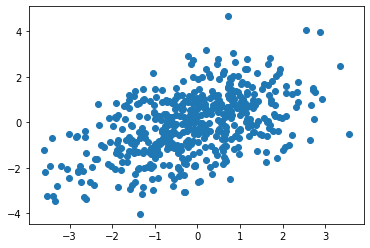

In [4]:
np.random.seed(4)
mu=np.array([0,0])
cov=np.array([[2,1],[1,2]])
X=np.random.multivariate_normal(mu,cov,N,check_valid='raise')
betat=np.random.uniform(0,1,P)
#sns.regplot(X[:,0],X[:,1])  # 绘制数据点
plt.plot(X[:,0],X[:,1],'o')

In [5]:
betat

array([0.2964262 , 0.48595574])

# 样本生成

## 方法一 
```python
np.random.rand()
```
用于生成（0,1]间的随机数  
缺点：不能很好的控制各亚组的样本数量

In [6]:
Y=np.zeros((N,2))
for i in range(N):
    a=np.random.rand()
    for j in range(M):
        if a>=weight1[j] and a<=weight1[j+1]:
            Y[i,0]=np.dot(X[i],betat)+np.random.normal(Theta[1,j],Theta[2,j])
            Y[i,1]=j


In [7]:
model = LinearRegression() # 构建线性模型
model.fit(X, Y[:,0]) # 自变量在前，因变量在后
coef = model.coef_ # 斜率
intercept = model.intercept_ # 截距
print(betat,'\n',model.coef_, model.intercept_) # 输出斜率和截距

[0.2964262  0.48595574] 
 [0.39587473 0.34729873] 0.7326528191303743


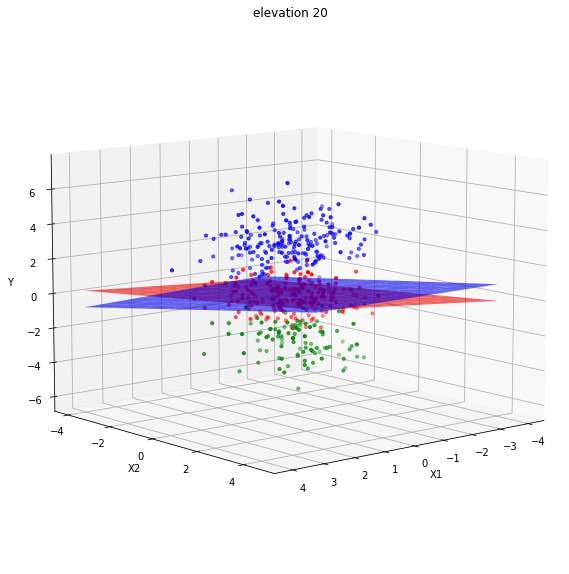

In [8]:
cdict = {1: 'red', 2: 'blue', 0: 'green'}

fig = plt.figure(figsize=(20,10))

xm = np.linspace(-4,4,10)
ym = np.linspace(-4,4,10)
Xm, Ym = np.meshgrid(xm, ym)

ax = fig.add_subplot( projection='3d')
for g in np.unique(Y[:,1]):
    ix = np.where(Y[:,1] == g)
    ax.scatter(X[ix,0], X[ix,1],Y[ix,0] ,c = cdict[g], label = g, s = 10)

ax.plot_surface(Xm,Ym,Z=betat[0]*Xm+betat[1]*Ym, color='b',alpha=0.6,label='True beta')
ax.plot_surface(Xm,Ym,Z=coef[0]*Xm+coef[1]*Ym, color='r',alpha=0.6,label='beta0')
ax.set_zlabel('Y')  # 坐标轴
ax.set_ylabel('X2')
ax.set_xlabel('X1')
ax.view_init(elev=10,azim=50)
ax.set_title('elevation 20')
plt.show()

scatter_x = np.array([1,2,3,4,5])
scatter_y = np.array([5,4,3,2,1])
group = np.array([1,3,2,1,3])
cdict = {1: 'red', 2: 'blue', 3: 'green'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.show()

## 方法二
分别按比例随机生成固定数目的样本

# H1下初值选取

## 方法一 查询

In [9]:
m0=2

In [10]:
Weight=np.array([0.1,0.3,0.5])
Weight0=np.array([0.1,0.9,0.3,0.7,0.5])
Weight1=np.array([[0.1,0.9],[0.9,0.1],[0.3,0.7],[0.7,0.3],[0.5,0.5]])
Theta00=np.zeros((5**m0,2*m0))#H1下的初始权重
theta00=np.zeros((5,m0,5**(m0-1),2))

In [11]:
aa=np.zeros((5**m0,m0))
for i in range (5**m0):
    for j in range(1,m0+1):
        aa[i,j-1]=np.floor(i/(5**(m0-j)))
        if aa[i,j-1]>4:
            aa[i,j-1]=aa[i,j-1]-5*np.floor(aa[i,j-1]/5)
aa

array([[0., 0.],
       [0., 1.],
       [0., 2.],
       [0., 3.],
       [0., 4.],
       [1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [2., 0.],
       [2., 1.],
       [2., 2.],
       [2., 3.],
       [2., 4.],
       [3., 0.],
       [3., 1.],
       [3., 2.],
       [3., 3.],
       [3., 4.],
       [4., 0.],
       [4., 1.],
       [4., 2.],
       [4., 3.],
       [4., 4.]])

In [12]:
cc=np.zeros((5**m0,m0))
for i in range (5**m0):
    for j in range(m0):
        cc[i,j]=np.floor(i/(5**(m0-j-1)))
        if cc[i,j]>4:
            cc[i,j]=cc[i,j]-5*np.floor(cc[i,j]/5)

In [13]:
bb=np.zeros((5**m0,m0))
for i in range(5**m0):
    for j in range(m0):
        a=int(aa[i,j])
        bb[i,j]=Weight0[a]

In [14]:
bb

array([[0.1, 0.1],
       [0.1, 0.9],
       [0.1, 0.3],
       [0.1, 0.7],
       [0.1, 0.5],
       [0.9, 0.1],
       [0.9, 0.9],
       [0.9, 0.3],
       [0.9, 0.7],
       [0.9, 0.5],
       [0.3, 0.1],
       [0.3, 0.9],
       [0.3, 0.3],
       [0.3, 0.7],
       [0.3, 0.5],
       [0.7, 0.1],
       [0.7, 0.9],
       [0.7, 0.3],
       [0.7, 0.7],
       [0.7, 0.5],
       [0.5, 0.1],
       [0.5, 0.9],
       [0.5, 0.3],
       [0.5, 0.7],
       [0.5, 0.5]])

In [15]:
dd=np.array([0.62071453, 0.37928547])

In [16]:
for i in range(5**m0):
    for j in range(m0):
        Theta00[i,2*j]=bb[i,j]*dd[j]
        Theta00[i,2*j+1]=(1-bb[i,j])*dd[j]


In [17]:
np.sum(Theta00[0])

1.0000000000000002

## 方法二 递归